This is an example for usage of regression using loan prediction dataset.

In [1]:
#To download dataset
!pip install opendatasets
import opendatasets as od
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
od.download('https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset')

Skipping, found downloaded files in "./loan-prediction-problem-dataset" (use force=True to force download)


In [9]:
!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset

loan-prediction-problem-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!ls

boston-housing-dataset.zip	 loan-prediction-problem-dataset.zip
loan-prediction-problem-dataset  sample_data


In [11]:
#unzipping the zip files and deleting the zip files
!unzip loan-prediction-problem-dataset.zip  && rm *.zip

Archive:  loan-prediction-problem-dataset.zip
  inflating: test_Y3wMUE5_7gLdaTN.csv  
  inflating: train_u6lujuX_CVtuZ9i.csv  


In [12]:
loan_df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [19]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [20]:
#Handling missing data
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean())
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mean())
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mean())
loan_df['Loan_Status'] = loan_df['Loan_Status'].map({'Y': 1, 'N': 0})
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [21]:
x = loan_df['LoanAmount']
y = loan_df['Loan_Status']
print(x.shape)
print(y.shape)
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

(614,)
(614,)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (491, 1)
x_test:  (123, 1)
y_train:  (491, 1)
y_test:  (123, 1)


In [23]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_train, y_train)  # perform linear regression without any parameters
y_pred=linear_regressor.predict(x_test)
y_pred[:5]

array([[0.70062504],
       [0.70084391],
       [0.70025407],
       [0.70082165],
       [0.70071778]])

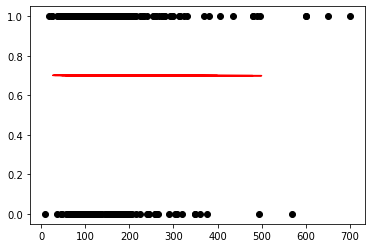

In [24]:
plt.scatter(x_train, y_train, color='black')
plt.plot(x_test, y_pred, color='red') #plotting linear regression with no parameters
plt.show()

In [25]:
#Metrics
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Results of sklearn.metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MSE: 0.23637088485757696
RMSE: 0.48617988940059725
R-Squared: -0.018819121655351045


In [26]:
linear_regressor = LinearRegression(fit_intercept=False)  # create object for the class
linear_regressor.fit(x_train, y_train)  # perform linear regression with fit_intercept as False
y_pred=linear_regressor.predict(x_test)
y_pred[:5]

array([[0.5070787 ],
       [0.29786441],
       [0.86167919],
       [0.31914044],
       [0.41842858]])

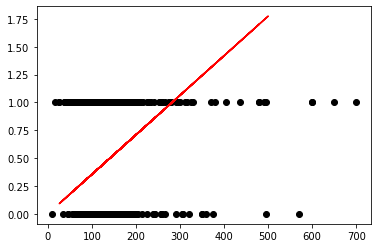

In [27]:
plt.scatter(x_train, y_train, color='black')
plt.plot(x_test, y_pred, color='red') #plotting linear regression with no parameters
plt.show()

In [28]:
#Metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Results of sklearn.metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MSE: 0.36525974118478866
RMSE: 0.6043672237843385
R-Squared: -0.5743631408503327


In [29]:
linear_regressor = LinearRegression(n_jobs=2)  # create object for the class
linear_regressor.fit(x_train, y_train)  # perform linear regression with n_jobs as 1
y_pred=linear_regressor.predict(x_test)
y_pred[:5]

array([[0.70062504],
       [0.70084391],
       [0.70025407],
       [0.70082165],
       [0.70071778]])

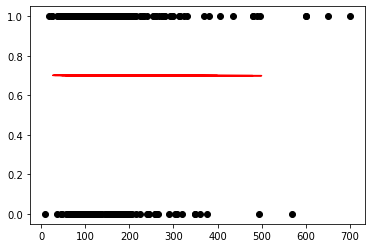

In [30]:
plt.scatter(x_train, y_train, color='black')
plt.plot(x_test, y_pred, color='red') #plotting linear regression with n_jobs as 1
plt.show()

In [31]:
#Metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Results of sklearn.metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MSE: 0.23637088485757696
RMSE: 0.48617988940059725
R-Squared: -0.018819121655351045


In [32]:
linear_regressor = LinearRegression(positive=True)  # create object for the class
linear_regressor.fit(x_train, y_train)  # perform linear regression with positive as True
y_pred=linear_regressor.predict(x_test)
y_pred[:5]

array([[0.700611],
       [0.700611],
       [0.700611],
       [0.700611],
       [0.700611]])

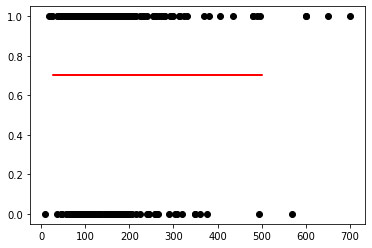

In [33]:
plt.scatter(x_train, y_train, color='black')
plt.plot(x_test, y_pred, color='red') #plotting linear regression with positive as True
plt.show()

In [34]:
#Metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Results of sklearn.metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MSE: 0.23642230963563401
RMSE: 0.48623277309909296
R-Squared: -0.01904077563461737
